In [1]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('input/train.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


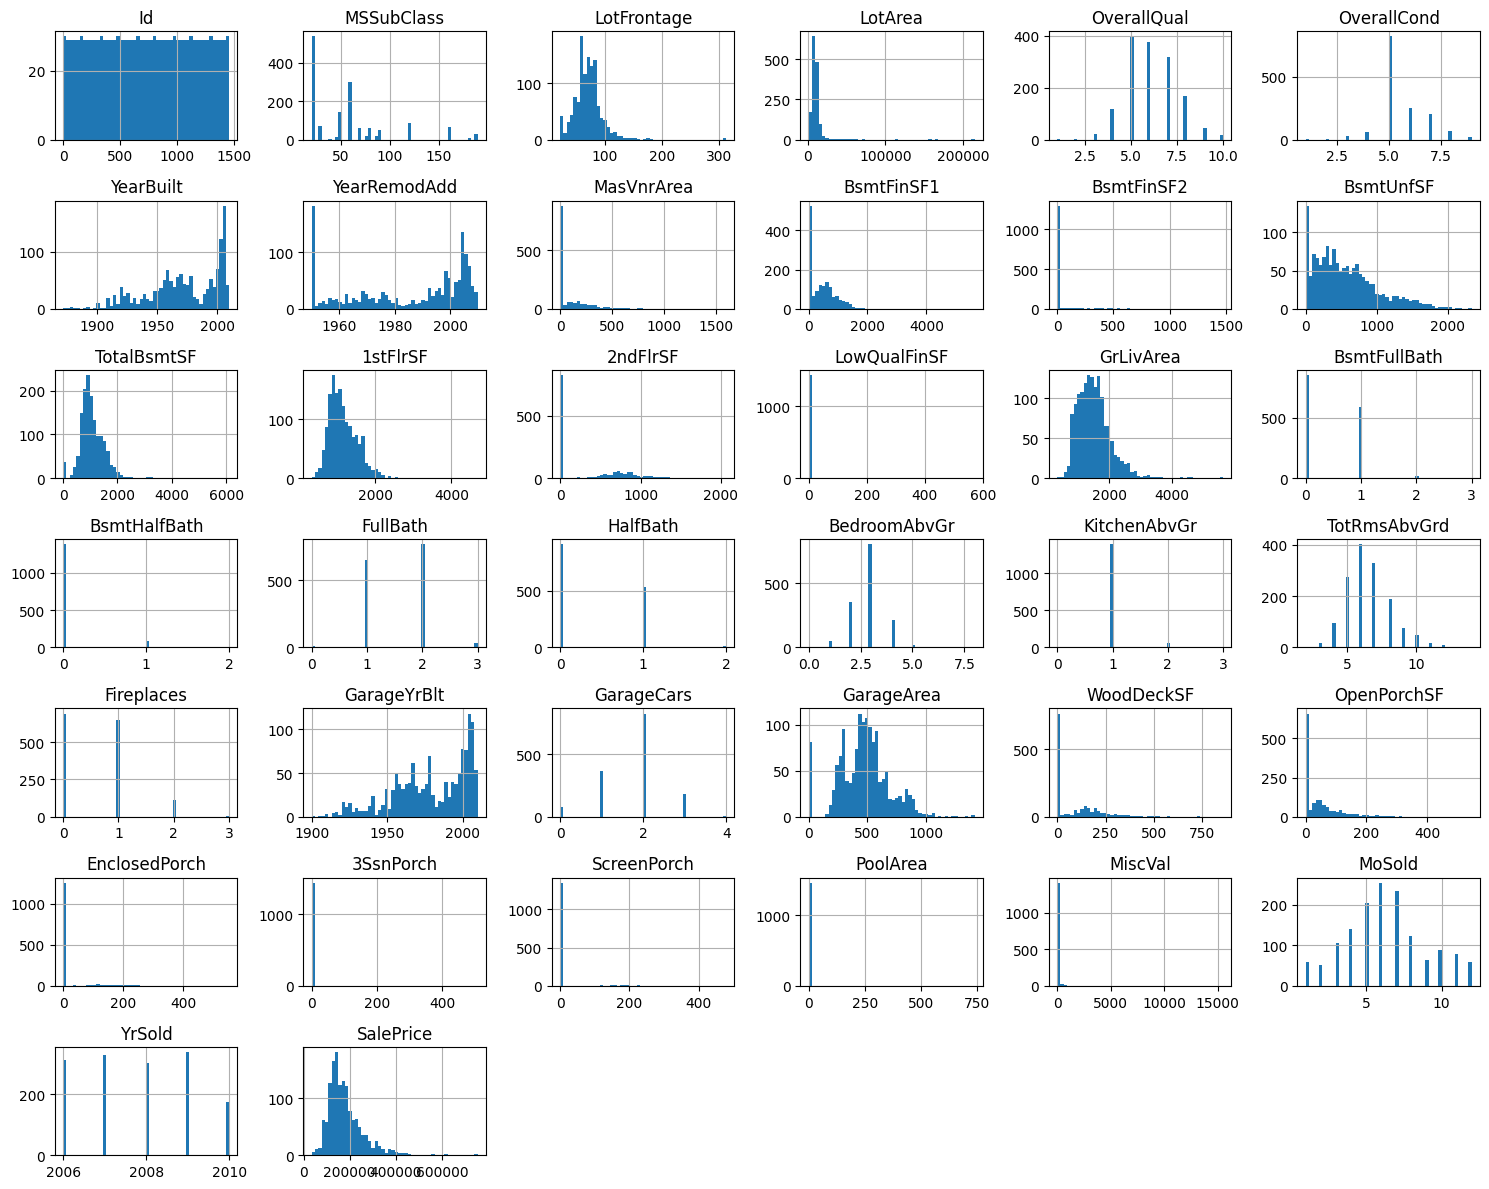

In [36]:
train.select_dtypes(include='number').hist(figsize=(15, 12), bins=50)
plt.tight_layout()
plt.show()

Numeric cols to character

MS SubClass represents a type of dwelling involved in the sale. It is a numeric variable, but really should be treated as a categorical variable. We will convert it to string.

YR Sold and Mo Sold are also numeric but we will treat them as categorical since we don't want to imply that 2009 is greater than 2008 for example.

cols_To_char = ["MSSubClass", "YrSold", "MoSold"]
train[cols_To_char] = train[cols_To_char].astype(str)

Correlation matrix

In [37]:
train.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [38]:
train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

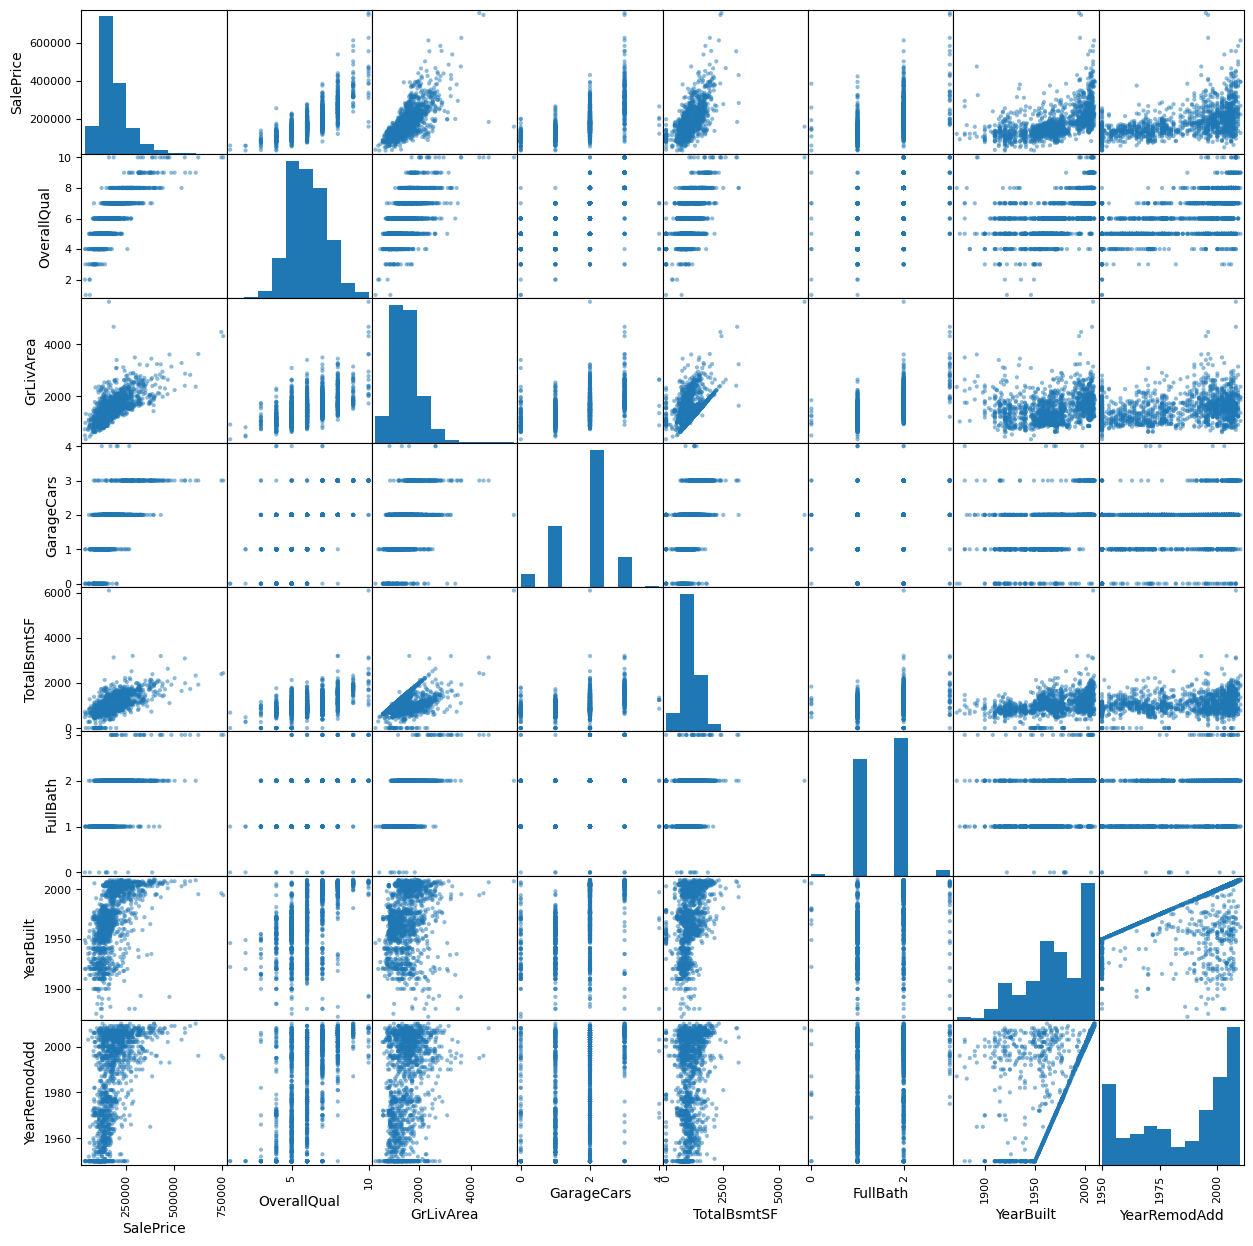

In [47]:
from pandas.plotting import scatter_matrix
cols_to_matrix = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
scatter_matrix(train[cols_to_matrix], figsize=(15, 15))
plt.show()

Two variables that stand out as being very highly correlated with SalePrice are OverallQual and GrLivArea. GarageCars,GarageArea and TotalBsmtSF also show strong correlation with SalePrice.

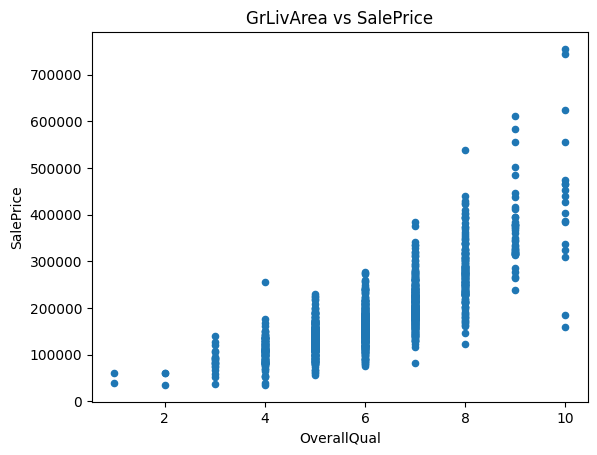

In [50]:
train.plot.scatter(x='OverallQual', y='SalePrice', title='GrLivArea vs SalePrice')
plt.show()

<Axes: title={'center': 'GrLivArea vs SalePrice'}, xlabel='GrLivArea', ylabel='SalePrice'>

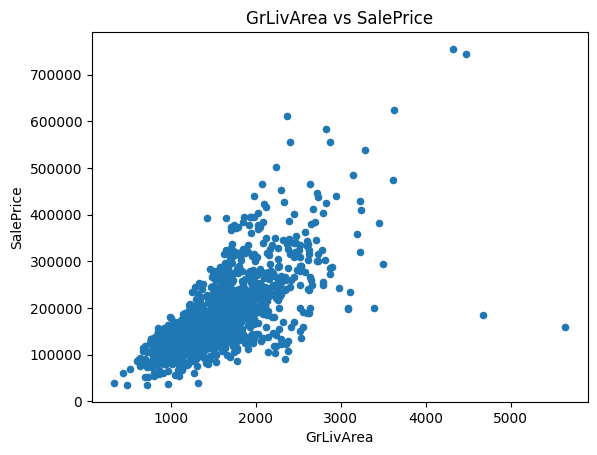

In [48]:
train.plot.scatter(x='GrLivArea', y='SalePrice', title='GrLivArea vs SalePrice')

<Axes: title={'center': 'GarageCars vs SalePrice'}, xlabel='GarageCars', ylabel='SalePrice'>

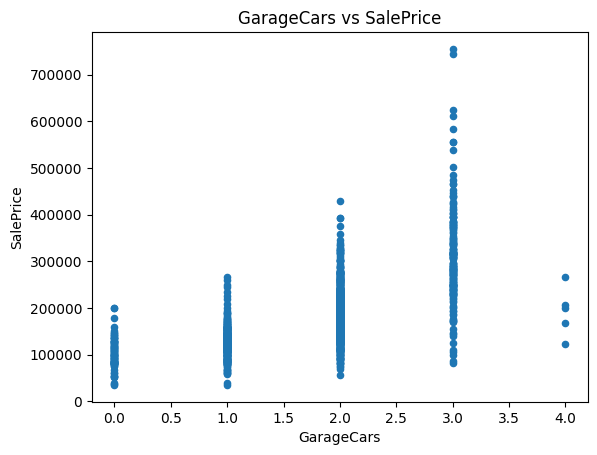

In [ ]:
train.plot.scatter(x='GarageCars', y='SalePrice', title='GarageCars vs SalePrice')

<Axes: title={'center': 'GarageArea vs SalePrice'}, xlabel='GarageArea', ylabel='SalePrice'>

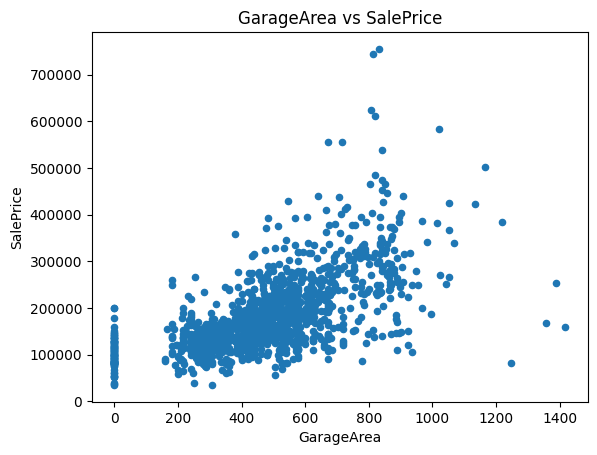

In [52]:
train.plot.scatter(x='GarageArea', y='SalePrice', title='GarageArea vs SalePrice')

<Axes: title={'center': 'TotalBsmtSF vs SalePrice'}, xlabel='TotalBsmtSF', ylabel='SalePrice'>

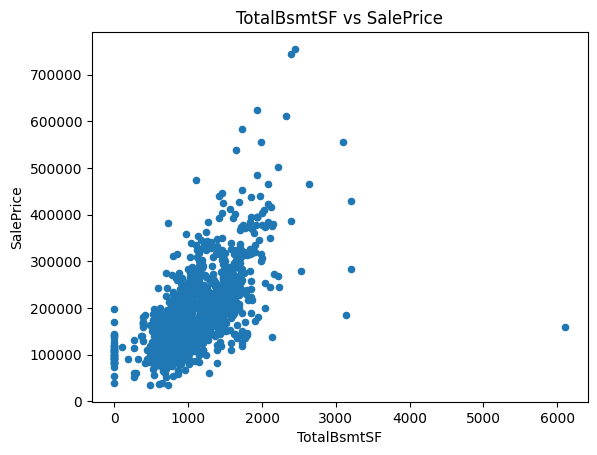

In [53]:
train.plot.scatter(x='TotalBsmtSF', y='SalePrice', title='TotalBsmtSF vs SalePrice')

Missing values in numeric columns

In [58]:
import numpy as np
train.select_dtypes(include=[np.number]).isna().sum().sort_values(ascending=False)

LotFrontage        259
GarageYrBlt         81
MasVnrArea           8
LotArea              0
OverallQual          0
Id                   0
MSSubClass           0
YearBuilt            0
OverallCond          0
BsmtFinSF1           0
YearRemodAdd         0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
BsmtFinSF2           0
LowQualFinSF         0
GrLivArea            0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
2ndFlrSF             0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
MoSold               0
YrSold               0
SalePrice            0
SalePrice_log10      0
dtype: int64

Impute missing numeric values with median

In [68]:
train_num = train.select_dtypes(include=[np.number])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(train_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [73]:
X = imputer.transform(train_num)
train_num_imputed = pd.DataFrame(X, columns=train_num.columns)
train_num_imputed.isna().sum().sort_values(ascending=False)

Id                 0
MSSubClass         0
LotFrontage        0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
SalePrice_log10    0
dtype: int64

Categorical columns

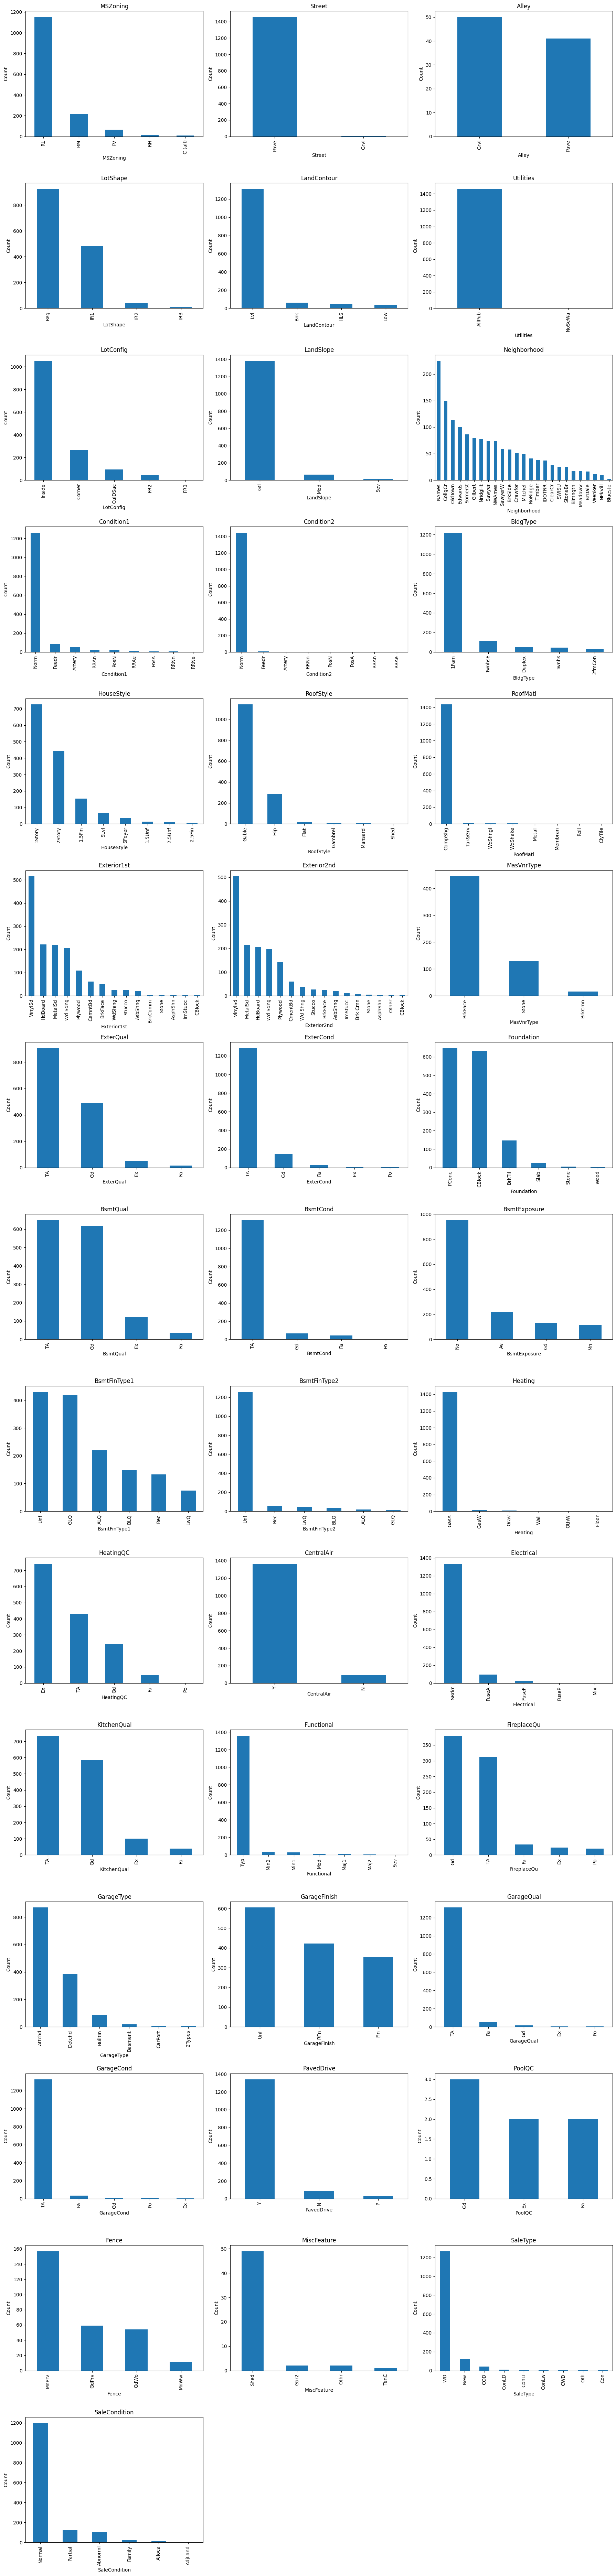

In [39]:
categorical_cols = train.select_dtypes(include='object').columns
fig, axes = plt.subplots(nrows=len(categorical_cols)//3 + 1, ncols=3, figsize=(18, 5 * (len(categorical_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    train[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [76]:
train.select_dtypes(include='object').isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageFinish       81
GarageQual         81
GarageType         81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
Condition1          0
Condition2          0
LotShape            0
Street              0
MSZoning            0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
RoofStyle           0
Heating             0
ExterCond           0
Foundation          0
HouseStyle          0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
BldgType            0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
SaleType            0
SaleCondition       0
dtype: int64

Fill missing categorical values with 'None'

In [77]:
cols_to_none = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                  "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish",
                  "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
train[cols_to_none] = train[cols_to_none].fillna('None')

<Axes: title={'center': 'Distribution of SalePrice'}, ylabel='Frequency'>

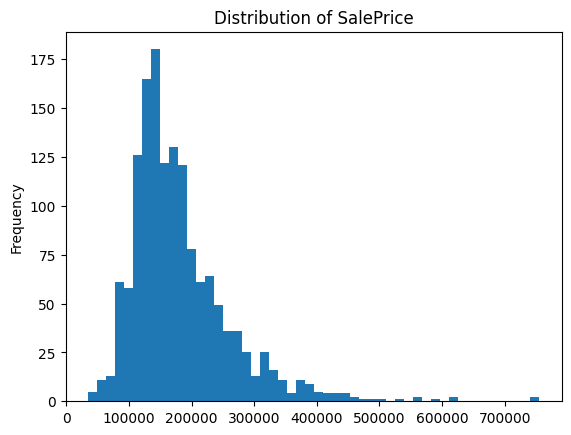

In [43]:
train['SalePrice'].plot(kind='hist', bins=50, title='Distribution of SalePrice')

<Axes: title={'center': 'Distribution of log 10  SalePrice'}, ylabel='Frequency'>

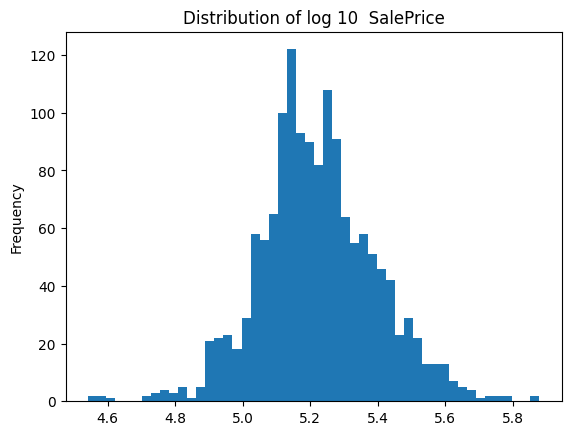

In [40]:
import numpy as np

train['SalePrice_log10'] = np.log10(train['SalePrice'])
train['SalePrice_log10'].plot(kind='hist', bins=50, title='Distribution of log 10  SalePrice')